<!--# <font color=darkblue>CE 5364 Groundwater Contaminant Transport Phenomena <br> Fall 2023 Exam 2 Template</font>-->

# F23 Exam 2 Solution Sketch

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Demonstrate ability to apply principles of groundwater contaminant transport

### Additional Instructions

The test is intended to be completed on blackboard.  The questions below are transcribed to BB as (in general) `file response` questions or in the short answer part, as essay response.

<hr><hr>

## Problem 1 (10 points)

In a plan view of a contaminant plume you observe that a conservative constituent (e.g. chloride) has moved about 1500 meters while a reactive constituent (e.g. chromium) has moved only 400 meters. Both species were released at the same time.

Determine:

1. Sketch the situation
2. An estimate of the distribution coefficient of the reactive species if the porosity is 0.35 and the solids density is 2.22 g/mL.

### Sketch:

![](sketch1.png)

### Estimate retardation

Using definition of retardation (and LEA):

$R = 1+\frac{1-n}{n}\rho_s K_d$

First find $R$ from the problem situation, then compute $K_d$.

$R = \frac{V_c}{V_r} = \frac{x_c}{t}\frac{t}{x_r} = \frac{1500m}{400m} = 3.75$

where the subscripts $_c$ and $_r$ represent conservative and reactive constituients, respectively.

In [392]:
x_c = 1500
x_r = 400
R = x_c/x_r
print("Retardation Coefficient : ",round(R,3))

Retardation Coefficient :  3.75


### Estimate $K_d$ for reactive constituient.

Using definition of retardation (and LEA):

$K_d = (R-1)\frac{n}{(1-n)\rho_s}=(3.75-1)\frac{0.35}{(1-0.35)\cdot2.22}$

In [393]:
n =0.35
rho_s = 2.22
Kd = (R-1)*(n/((1-n)*rho_s))
print("Reactive species distribution coefficient",round(Kd,3)," mL/g")

Reactive species distribution coefficient 0.667  mL/g


<hr><hr>

## Problem 2 (10 points)

Water in the unsaturated zone contains chlorobenzene at a concentration of 50 mg/L. 

Determine:

1. The equilibrium concentration of chlorobenzene in soil air with this water, in mg/L
2. The equilibrium concentration of chlorobenzene in soil air with this water, in $\mu g/m^3$

### Obtain Henry's law values for target species.

![](HenryLawPr2.png)



In [394]:
Kh = 2.4e-03 # mol/m^3-Pa  
# from same source document above the volatility constant in dimensionless gas/aqueous is
KHvcc = 0.168081 # Cgas/Caq (dimensionless) or use value in textbook of 0.165
Caq = 50 #mg/L 
Cgas = KHvcc*Caq
print("Gas concentration is :",round(Cgas,3)," mg/L")
# comvert to other units
print("Gas concentration is :",round(Cgas*1000*1000,3)," ug/m^3")

Gas concentration is : 8.404  mg/L
Gas concentration is : 8404050.0  ug/m^3


<hr><hr> 

## Problem 3 (20 Points)

A cubic meter of sand-gravel aquifer is contaminated with 20 L of tetrachloroethylene (PCE). The aquifer has porosity of 20% and hydraulic conductivity of 410 m/d. You may assume that the air content is negligible.

Determine:
1. Sketch the situation
2. The equilibrium concentration of PCE in the water phase.
3. The mass of PCE in the water phase.
4. What is the mass PCE in the NAPL phase.
5. If the aquifer gradient is 0.001 estimate how long it would take to completely dissolve and flush the PCE from the cubic-meter source zone.

### Sketch

![](pcespill.png)



### Equilibrium concentration(s) 

1. PCE solubility from table 7.1; $PCE_{aq} = 150 ~ \frac{mg}{L}$
2. Total void volume $n*V_{aquifer}$
3. Density PCE is $ 1.631 \frac{g}{mL}$ (also from table 7.1).
4. Sand/gravel $f_{oc} = 0.0011$ estimate from literature:

![](focdata.png)

5. $k_{ow} = 390 $ estimate from literature (table 7.1)

6. $k_{oc} = 316~\frac{L}{kg}$ see computation below

7. $k_d = k_{oc}f_{oc} = 316*0.0011 = 0.348$


In [395]:
porosity = 0.20 #given
volumeAquifer = 1.0*1000 #given
volumeVoids = porosity*volumeAquifer
volumeSolids = (1-porosity)*volumeAquifer
print("Volume Solids :",round(volumeSolids,3)," Liters ")
print("Volume Voids :",round(volumeVoids,3)," Liters ")
volumePCE = 20 #L
volumeWater = volumeVoids-volumePCE
print("Volume Water (Initial Guess) :",round(volumeWater,3)," Liters ")
solubilityPCE = 150 #mg/L
massPCEaqueous = solubilityPCE*volumeWater #mg
print("Mass PCE aqueous :",round(massPCEaqueous/1000,3)," grams")
################ aqueous-solid partitioning ###################
print("\nAqueous-Solid Partitioning\n")
import math
foc = 0.0011
kow = 390 #L/kg
print("   foc approx: ",round(foc,4))
# using a regression formula
logkoc = math.log(kow)-0.21
koc = math.exp(logkoc)
print("   koc approx: ",round(koc,3))
kd = koc*foc
print("    kd approx: ",round(kd,3))
massSolids = (volumeSolids)*2.65
#print("Mass Solids :",massSolids," kg")
massPCEsolid = kd*(solubilityPCE*volumeWater)*volumeSolids
print("Mass PCE solid :",round(massPCEsolid/1000,3)," grams")
################## free phase water/solid partitioning
print("\nFree-Phase Partitioning\n")
densityPCE = 1.631 #g/mL
volumePCE = 20 #L
print("   Mass PCE total (released) :",round(massPCE,1)," grams")
massPCEnapl = massPCE-massPCEaqueous/1000-massPCEsolid/1000
print("         Mass PCE Free-Phase :",round(massPCEnapl,1)," grams")
print("   Mass PCE adsorbed (solid) :",round(massPCEsolid/1000,3)," grams")
print("Mass PCE dissolved (aqueous) :",round(massPCEaqueous/1000,3)," grams")
checksum = massPCEnapl+massPCEsolid/1000+massPCEaqueous/1000
print("          Checksum PCE total :",round(checksum,3)," grams")


Volume Solids : 800.0  Liters 
Volume Voids : 200.0  Liters 
Volume Water (Initial Guess) : 180.0  Liters 
Mass PCE aqueous : 27.0  grams

Aqueous-Solid Partitioning

   foc approx:  0.0011
   koc approx:  316.128
    kd approx:  0.348
Mass PCE solid : 7511.198  grams

Free-Phase Partitioning

   Mass PCE total (released) : 32620.0  grams
         Mass PCE Free-Phase : 25081.8  grams
   Mass PCE adsorbed (solid) : 7511.198  grams
Mass PCE dissolved (aqueous) : 27.0  grams
          Checksum PCE total : 32620.0  grams


### Time to flush

Dissolve all the PCE, then how many pore volumes to flush the source zone.

Estimate neglects adsorbtion/desorbtion time (assumes instant, also assumes dissolution is always at solubility.



In [396]:
import math
liters = massPCE*1000/solubilityPCE
print("Minimum flush volume :",round(liters,3)," liters")
K = 410 #m/d
A = 1 #m^2
i = 0.001
q = 1000* K*A*i
print("Flushing rate :",round(q,1)," liters/day")
time2flush = liters/q
print("Flushing duration ",round(time2flush,3)," days")


Minimum flush volume : 217466.667  liters
Flushing rate : 410.0  liters/day
Flushing duration  530.407  days


<!-- <hr><hr> 

## Problem 4 

A fuel mixture includes benzene, toluene, and ethylbenzene at mole fractions of 0.075,0.065, and 0.035 respectively.  The mixture is allowed to come to equilibrium with the atmosphere at 25$^o$C

The following information from the textbook is useful

![](Fig4-13.png) ![](Tab7-1.png)

Determine:

1. The concentrations of these VOCs in air in mg/L and $\mu g/m^3$ -->

<hr><hr> 

## Problem 4 (30 points)

**Adapted from Baetsle, L.H. (1969). Migration of Radionuclides in Porous Media. In: A. M. F. Duhamel (Eds.), Progress in Nuclear Energy Series XII, Health Physics, pp.707-730. Pergamon Press, Elmsford, NY.**  

A leak in a storage tank for radioactive waste results in an accidental release of 1000 ci (curie) of 10 yr cooled fission products and tritium.  The waste contains 400 ci Cs-137(t$_{1/2}$=33yr),400 ci Sr-90(t$_{1/2}$=28yr),100 ci Pm-147(t$_{1/2}$=2.7yr), and 100 ci H-3(t$_{1/2}$=12.26yr).  A stream exists 100 m downgradient of the release.  The groundwater velocity is 0.1 meters per day. Other data:

|Nuclide|$K_d$(mg/L)|$R_f$|$D_x$(cm^2/sec)|$D_y=D_z$||
|---|-----|---|---|---|---|
|Cs-137|10|47.6|$10^{-4}$|$10^{-3}$|$~$|
|Sr-90 |0.6|2.885|$10^{-3}$|$10^{-5}$||
|Pm-147|100|476.|$10^{-5}$|$10^{-5}$||
|H-3   |0|1.|$10^{-5}$|$10^{-5}$||


Determine:

1. Sketch the situation
2. A time history (plot) for each constituient at the stream-aquifer interface that captures the peak concentration for each constituient

*A useful analytical solution is found as Eq. 2 in [A Probabilistic Framework for the Assessment of Environmental Effects in Groundwater Contaminant Hydrology](http://www.scienpress.com/Upload/GEO/Vol%2010_5_5.pdf).  Equation 6.28 (textbook) is an identical equation*

### Enter your solution below, or attach separate sheet(s) with your solution.

Create a 3D impulse function:

In [397]:
def impulse3D(x,y,z,t,mass,dx,dy,dz,v,r,decay):
    import math
    tadj = t/r
    term1 = ((8.0*math.pi*tadj)**(3/2))*math.sqrt(dx*dy*dz)
    term2 = math.exp(-((x-v*tadj)**2)/(4.0*dx*tadj) \
                     -((y       )**2)/(4.0*dy*tadj) \
                     -((z       )**2)/(4.0*dz*tadj) \
                     -(decay*tadj))
    impulse3D = (term2/term1)*mass
#    print(term2/term1)
    return(impulse3D)

In [398]:
import math
# given hydraulic data
distance = 100 #meters to stream
velocity = 0.1 #m/day
# treat initial activity as "mass" in ADE
cs137init=400/1000
sr90init=400/1000
pm147init=100/1000
h3init=100/1000
# transport properties
r_cs137 = 47.6
r_sr90  = 2.885
r_pm147 = 476.
r_h3    = 1.0
# dispersion
dxcs137=1e-04*(1/100)*(1/100)*86400 #cm^2/sec convert to m^2/day
dycs137=1e-03*(1/100)*(1/100)*86400
dzcs137=1e-03*(1/100)*(1/100)*86400
dxsr90=1e-03*(1/100)*(1/100)*86400 #cm^2/sec convert to m^2/day
dysr90=1e-05*(1/100)*(1/100)*86400
dzsr90=1e-05*(1/100)*(1/100)*86400
dxpm147=1e-05*(1/100)*(1/100)*86400 #cm^2/sec convert to m^2/day
dypm147=1e-05*(1/100)*(1/100)*86400
dzpm147=1e-05*(1/100)*(1/100)*86400
dxh3=1e-05*(1/100)*(1/100)*86400 #cm^2/sec convert to m^2/day
dyh3=1e-05*(1/100)*(1/100)*86400
dzh3=1e-05*(1/100)*(1/100)*86400
# decay
decay_cs137=math.log(2)/(33*365) #decay rate in recipricol days
decay_sr90=math.log(2)/(28*365) #decay rate in recipricol days
decay_pm147=math.log(2)/(2.7*365) #decay rate in recipricol days
decay_h3=math.log(2)/(12.26*365) #decay rate in recipricol days
#print(decay_h3)


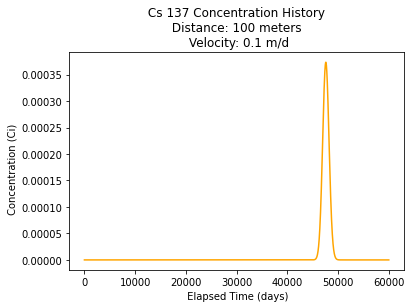

In [399]:
deltat      = 2 #days
howmany     = 30000 #how many points to compute
t = [] #days
time=1000
for i in range(howmany):
    if i == 0:
        t.append((0.00001)) #avoid divide by zero in function
    else:
        t.append((float(i))*deltat)
        
ccs137 = [0 for i in range(howmany)] #concentration 
csr90 = [0 for i in range(howmany)] #concentration 
cpm147 = [0 for i in range(howmany)] #concentration 
ch3 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    ccs137[i]=impulse3D(distance,0,0,t[i],cs137init,dxcs137,dycs137,dzcs137,velocity,r_cs137,decay_cs137)
    csr90[i]=impulse3D(distance,0,0,t[i],sr90init,dxsr90,dysr90,dzsr90,velocity,r_sr90,decay_sr90)
    cpm147[i]=impulse3D(distance,0,0,t[i],pm147init,dxpm147,dypm147,dzpm147,velocity,r_pm147,decay_pm147)
    ch3[i]=impulse3D(distance,0,0,t[i],h3init,dxh3,dyh3,dzh3,velocity,r_h3,decay_h3)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,ccs137, color='orange', linestyle = 'solid')  # make the plot object
#plt.plot(t,csr90, color='gray', linestyle = 'solid')  # make the plot object
#plt.plot(t,cpm147, color='magenta', linestyle = 'solid')  # make the plot object
#plt.plot(t,ch3, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Cs 137 Concentration History \n Distance: " + repr(distance) + " meters \n"  + " Velocity: " + repr(velocity) + " m/d") # caption the plot object
plt.xlabel(" Elapsed Time (days)") # label x-axis
plt.ylabel(" Concentration (Ci)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

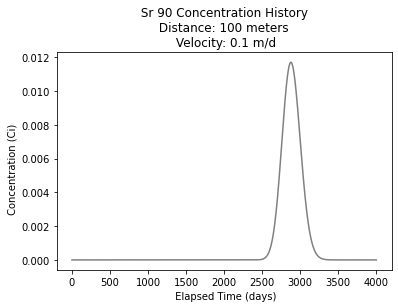

In [400]:
deltat      = 1 #days
howmany     = 4000 #how many points to compute
t = [] #days
time=1000
for i in range(howmany):
    if i == 0:
        t.append((0.00001)) #avoid divide by zero in function
    else:
        t.append((float(i))*deltat)
        
ccs137 = [0 for i in range(howmany)] #concentration 
csr90 = [0 for i in range(howmany)] #concentration 
cpm147 = [0 for i in range(howmany)] #concentration 
ch3 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    ccs137[i]=impulse3D(distance,0,0,t[i],cs137init,dxcs137,dycs137,dzcs137,velocity,r_cs137,decay_cs137)
    csr90[i]=impulse3D(distance,0,0,t[i],sr90init,dxsr90,dysr90,dzsr90,velocity,r_sr90,decay_sr90)
    cpm147[i]=impulse3D(distance,0,0,t[i],pm147init,dxpm147,dypm147,dzpm147,velocity,r_pm147,decay_pm147)
    ch3[i]=impulse3D(distance,0,0,t[i],h3init,dxh3,dyh3,dzh3,velocity,r_h3,decay_h3)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
#plt.plot(t,ccs137, color='orange', linestyle = 'solid')  # make the plot object
plt.plot(t,csr90, color='gray', linestyle = 'solid')  # make the plot object
#plt.plot(t,cpm147, color='magenta', linestyle = 'solid')  # make the plot object
#plt.plot(t,ch3, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Sr 90 Concentration History \n Distance: " + repr(distance) + " meters \n"  + " Velocity: " + repr(velocity) + " m/d") # caption the plot object
plt.xlabel(" Elapsed Time (days)") # label x-axis
plt.ylabel(" Concentration (Ci)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

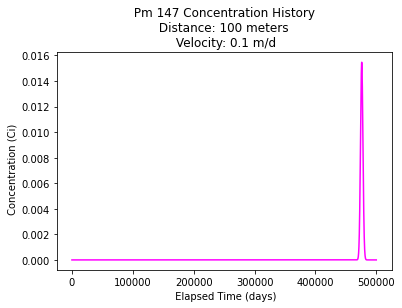

In [401]:
deltat      = 100 #days
howmany     = 5000 #how many points to compute
t = [] #days
time=1000
for i in range(howmany):
    if i == 0:
        t.append((0.00001)) #avoid divide by zero in function
    else:
        t.append((float(i))*deltat)
        
ccs137 = [0 for i in range(howmany)] #concentration 
csr90 = [0 for i in range(howmany)] #concentration 
cpm147 = [0 for i in range(howmany)] #concentration 
ch3 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    ccs137[i]=impulse3D(distance,0,0,t[i],cs137init,dxcs137,dycs137,dzcs137,velocity,r_cs137,decay_cs137)
    csr90[i]=impulse3D(distance,0,0,t[i],sr90init,dxsr90,dysr90,dzsr90,velocity,r_sr90,decay_sr90)
    cpm147[i]=impulse3D(distance,0,0,t[i],pm147init,dxpm147,dypm147,dzpm147,velocity,r_pm147,decay_pm147)
    ch3[i]=impulse3D(distance,0,0,t[i],h3init,dxh3,dyh3,dzh3,velocity,r_h3,decay_h3)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
#plt.plot(t,ccs137, color='orange', linestyle = 'solid')  # make the plot object
#plt.plot(t,csr90, color='gray', linestyle = 'solid')  # make the plot object
plt.plot(t,cpm147, color='magenta', linestyle = 'solid')  # make the plot object
#plt.plot(t,ch3, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Pm 147 Concentration History \n Distance: " + repr(distance) + " meters \n"  + " Velocity: " + repr(velocity) + " m/d") # caption the plot object
plt.xlabel(" Elapsed Time (days)") # label x-axis
plt.ylabel(" Concentration (Ci)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

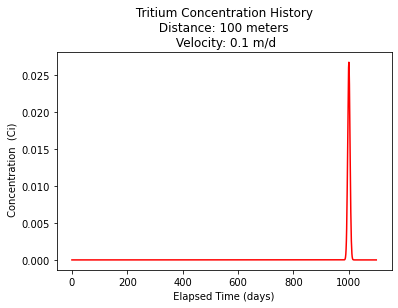

In [402]:
deltat      = 1 #days
howmany     = 1100 #how many points to compute
t = [] #days
time=1000
for i in range(howmany):
    if i == 0:
        t.append((0.00001)) #avoid divide by zero in function
    else:
        t.append((float(i))*deltat)
        
ccs137 = [0 for i in range(howmany)] #concentration 
csr90 = [0 for i in range(howmany)] #concentration 
cpm147 = [0 for i in range(howmany)] #concentration 
ch3 = [0 for i in range(howmany)] #concentration 
for i in range(howmany):
    ccs137[i]=impulse3D(distance,0,0,t[i],cs137init,dxcs137,dycs137,dzcs137,velocity,r_cs137,decay_cs137)
    csr90[i]=impulse3D(distance,0,0,t[i],sr90init,dxsr90,dysr90,dzsr90,velocity,r_sr90,decay_sr90)
    cpm147[i]=impulse3D(distance,0,0,t[i],pm147init,dxpm147,dypm147,dzpm147,velocity,r_pm147,decay_pm147)
    ch3[i]=impulse3D(distance,0,0,t[i],h3init,dxh3,dyh3,dzh3,velocity,r_h3,decay_h3)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
#plt.plot(t,ccs137, color='orange', linestyle = 'solid')  # make the plot object
#plt.plot(t,csr90, color='gray', linestyle = 'solid')  # make the plot object
#plt.plot(t,cpm147, color='magenta', linestyle = 'solid')  # make the plot object
plt.plot(t,ch3, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Tritium Concentration History \n Distance: " + repr(distance) + " meters \n"  + " Velocity: " + repr(velocity) + " m/d") # caption the plot object
plt.xlabel(" Elapsed Time (days) ") # label x-axis
plt.ylabel(" Concentration  (Ci)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Advective Front Position : ",round(time*velocity,2)," length units")
#print("Total Mass : ",round(mass,3)," kg")

<hr>
<hr>

## Problem 5 (20 points)

Dissolution of constituents from a residual NAPL source results in a contaminant plume whose maximum length is determined by the balance between advection and decay. 

Determine:
1. Develop an expression (or a method) for the plume length (from source to target MCL value) if the source-term concentration is $C_0$. 
2. Apply the expression (or method) to estimate the maximum length of a benzene plume whose equilibrium concentration in water at the source is 2.4 mg/L and whose MCL is 0.005mg/L. Assume that the pore velocity is 0.35 m/d and the half-life of the benzene in a first order decay model is 60 days. Assume that the retardation coefficient for benzene in the aquifer is 2.

### Enter your solution below, or attach separate sheet(s) with your solution.

- Build a model that is advection dominant (use a small value for dispersion).
$$\frac{\partial C}{\partial t}  =  \frac{\partial}{\partial x} D_x \frac{\partial C}{\partial x} - v_x \frac{\partial C}{\partial x} - \lambda C$$
- Run the model for different times, determine distance the MCL.
$$C(x_{MCL},t) = MCL$$
- Plot time vs. distance (should be approaching some asymptotic distance)
- Extrapolate to the asymptotic distance (time)
- Verify with model; report plume length.

In [403]:
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    return c1dadrd

First screen pass:

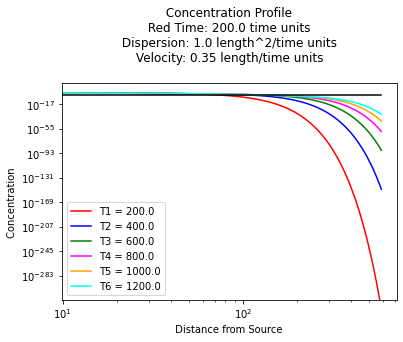

In [404]:
#
# example inputs
#
c_source = 2.4 # source concentration
c_mcl = 0.005 # MCL concentration
space = 600.      # how far in X-direction to extend the plot
time  = 200.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 0.35    # pore velocity
retardation = 2.0
decay = math.log(2)/60
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c1 = [0.0 for i in range(how_many_points)]      # constructor notation
c2 = [0.0 for i in range(how_many_points)]      # constructor notation
c3 = [0.0 for i in range(how_many_points)]      # constructor notation
c4 = [0.0 for i in range(how_many_points)]      # constructor notation
c5 = [0.0 for i in range(how_many_points)]      # constructor notation
c6 = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c1[i] = c1dadrd(c_source,x[i],1*time,dispersion,velocity,retardation,decay)
    c2[i] = c1dadrd(c_source,x[i],2*time,dispersion,velocity,retardation,decay)
    c3[i] = c1dadrd(c_source,x[i],3*time,dispersion,velocity,retardation,decay)
    c4[i] = c1dadrd(c_source,x[i],4*time,dispersion,velocity,retardation,decay)
    c5[i] = c1dadrd(c_source,x[i],5*time,dispersion,velocity,retardation,decay)
    c6[i] = c1dadrd(c_source,x[i],6*time,dispersion,velocity,retardation,decay)

#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(x,c2, color='blue', linestyle = 'solid')  # make the plot object
plt.plot(x,c3, color='green', linestyle = 'solid')  # make the plot object
plt.plot(x,c4, color='magenta', linestyle = 'solid')  # make the plot object
plt.plot(x,c5, color='orange', linestyle = 'solid')  # make the plot object
plt.plot(x,c6, color='cyan', linestyle = 'solid')  # make the plot object
plt.plot([x[0],x[-1]],[c_mcl,c_mcl], color='black', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Red Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
plt.legend(["T1 = " + repr(1*time),"T2 = " + repr(2*time),"T3 = " + repr(3*time),\
            "T4 = " + repr(4*time),"T5 = " + repr(5*time),"T6 = " + repr(6*time)])
plt.xscale("log")
plt.yscale("log")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [405]:
# now search array for MCL value
whois=min(enumerate(c1), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",1*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c2), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",2*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c3), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",3*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c4), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",4*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c5), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",5*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c6), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",6*time," days is: ",x[whois[0]]," meters ")


distance to MCL at time : 200.0  days is:  72.0  meters 
distance to MCL at time : 400.0  days is:  96.0  meters 
distance to MCL at time : 600.0  days is:  108.0  meters 
distance to MCL at time : 800.0  days is:  108.0  meters 
distance to MCL at time : 1000.0  days is:  108.0  meters 
distance to MCL at time : 1200.0  days is:  108.0  meters 


Now repeat, but start at time 400 days - to check if have asymptotic result

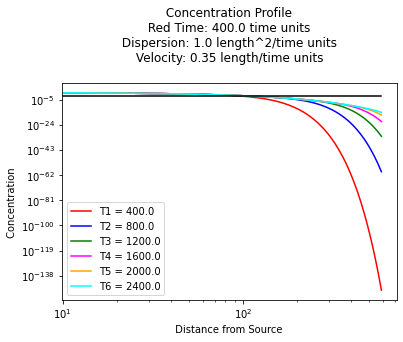

In [406]:
#
# example inputs
#
c_source = 2.4 # source concentration
c_mcl = 0.005 # MCL concentration
space = 600.      # how far in X-direction to extend the plot
time  = 400.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 0.35    # pore velocity
retardation = 2.0
decay = math.log(2)/60
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c1 = [0.0 for i in range(how_many_points)]      # constructor notation
c2 = [0.0 for i in range(how_many_points)]      # constructor notation
c3 = [0.0 for i in range(how_many_points)]      # constructor notation
c4 = [0.0 for i in range(how_many_points)]      # constructor notation
c5 = [0.0 for i in range(how_many_points)]      # constructor notation
c6 = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c1[i] = c1dadrd(c_source,x[i],1*time,dispersion,velocity,retardation,decay)
    c2[i] = c1dadrd(c_source,x[i],2*time,dispersion,velocity,retardation,decay)
    c3[i] = c1dadrd(c_source,x[i],3*time,dispersion,velocity,retardation,decay)
    c4[i] = c1dadrd(c_source,x[i],4*time,dispersion,velocity,retardation,decay)
    c5[i] = c1dadrd(c_source,x[i],5*time,dispersion,velocity,retardation,decay)
    c6[i] = c1dadrd(c_source,x[i],6*time,dispersion,velocity,retardation,decay)

#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(x,c2, color='blue', linestyle = 'solid')  # make the plot object
plt.plot(x,c3, color='green', linestyle = 'solid')  # make the plot object
plt.plot(x,c4, color='magenta', linestyle = 'solid')  # make the plot object
plt.plot(x,c5, color='orange', linestyle = 'solid')  # make the plot object
plt.plot(x,c6, color='cyan', linestyle = 'solid')  # make the plot object
plt.plot([x[0],x[-1]],[c_mcl,c_mcl], color='black', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Red Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
plt.legend(["T1 = " + repr(1*time),"T2 = " + repr(2*time),"T3 = " + repr(3*time),\
            "T4 = " + repr(4*time),"T5 = " + repr(5*time),"T6 = " + repr(6*time)])
plt.xscale("log")
plt.yscale("log")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [407]:
# now search array for MCL value
whois=min(enumerate(c1), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",1*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c2), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",2*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c3), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",3*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c4), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",4*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c5), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",5*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c6), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",6*time," days is: ",x[whois[0]]," meters ")


distance to MCL at time : 400.0  days is:  96.0  meters 
distance to MCL at time : 800.0  days is:  108.0  meters 
distance to MCL at time : 1200.0  days is:  108.0  meters 
distance to MCL at time : 1600.0  days is:  108.0  meters 
distance to MCL at time : 2000.0  days is:  108.0  meters 
distance to MCL at time : 2400.0  days is:  108.0  meters 


So from simulation the result is the plume length is 108 meters from source to MCL using supplied values.

<hr>
<hr>

## Problem 6 (10 points)

Consider an MTBE plume originating from a leaky gasoline storage tank.  The free-phase gasoline contains MTBE at 0.2 mole-fraction. The seepage velocity is $1~ \frac{ft}{d}$ and the half-life for first-order decay of MTBE (from biochemical activity) is $T_{1/2} = 365~day$ and the retardation coefficient for MTBE in the auqifer is $R=1.1$.

Determine:
1. The MTBE concentration in the water phase at the source.
2. The anticipated plume length from the source to a concentration limit of $C=20~\frac{\mu g}{L}$



### Enter your solution below, or attach separate sheet(s) with your solution.

Use prior tool but adjust for MTBE source.

![](mtbe.png)

Estimate water solubility as $X_{MTBE} \cdot 45000\frac{mg}{L}$

In [408]:
X_mtbe = 0.2
S_mtbe = 45000
c_init = X_mtbe*S_mtbe
print("Source Concentration (Initial) : ",c_init," mg/L")

Source Concentration (Initial) :  9000.0  mg/L


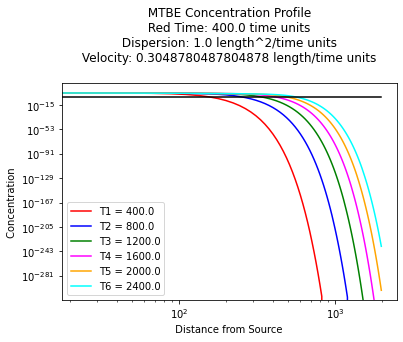

In [409]:
#
# example inputs
#
c_source = c_init # source concentration
c_mcl = 0.020 # MCL concentration
space = 2000.      # how far in X-direction to extend the plot
time  = 400.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 1*(1/3.28)   # pore velocity (meters per day)
retardation = 2.0
decay = math.log(2)/365
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 90   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c1 = [0.0 for i in range(how_many_points)]      # constructor notation
c2 = [0.0 for i in range(how_many_points)]      # constructor notation
c3 = [0.0 for i in range(how_many_points)]      # constructor notation
c4 = [0.0 for i in range(how_many_points)]      # constructor notation
c5 = [0.0 for i in range(how_many_points)]      # constructor notation
c6 = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c1[i] = c1dadrd(c_source,x[i],1*time,dispersion,velocity,retardation,decay)
    c2[i] = c1dadrd(c_source,x[i],2*time,dispersion,velocity,retardation,decay)
    c3[i] = c1dadrd(c_source,x[i],3*time,dispersion,velocity,retardation,decay)
    c4[i] = c1dadrd(c_source,x[i],4*time,dispersion,velocity,retardation,decay)
    c5[i] = c1dadrd(c_source,x[i],5*time,dispersion,velocity,retardation,decay)
    c6[i] = c1dadrd(c_source,x[i],6*time,dispersion,velocity,retardation,decay)

#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(x,c2, color='blue', linestyle = 'solid')  # make the plot object
plt.plot(x,c3, color='green', linestyle = 'solid')  # make the plot object
plt.plot(x,c4, color='magenta', linestyle = 'solid')  # make the plot object
plt.plot(x,c5, color='orange', linestyle = 'solid')  # make the plot object
plt.plot(x,c6, color='cyan', linestyle = 'solid')  # make the plot object
plt.plot([x[0],x[-1]],[c_mcl,c_mcl], color='black', linestyle = 'solid')  # make the plot object
plt.title(" MTBE Concentration Profile \n Red Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
plt.legend(["T1 = " + repr(1*time),"T2 = " + repr(2*time),"T3 = " + repr(3*time),\
            "T4 = " + repr(4*time),"T5 = " + repr(5*time),"T6 = " + repr(6*time)])
plt.xscale("log")
plt.yscale("log")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [410]:
# now search array for MCL value
whois=min(enumerate(c1), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",1*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c2), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",2*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c3), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",3*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c4), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",4*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c5), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",5*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c6), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",6*time," days is: ",x[whois[0]]," meters ")


distance to MCL at time : 400.0  days is:  155.55555555555554  meters 
distance to MCL at time : 800.0  days is:  244.44444444444443  meters 
distance to MCL at time : 1200.0  days is:  333.3333333333333  meters 
distance to MCL at time : 1600.0  days is:  400.0  meters 
distance to MCL at time : 2000.0  days is:  488.88888888888886  meters 
distance to MCL at time : 2400.0  days is:  555.5555555555555  meters 


Need to start at later time, 2400 days

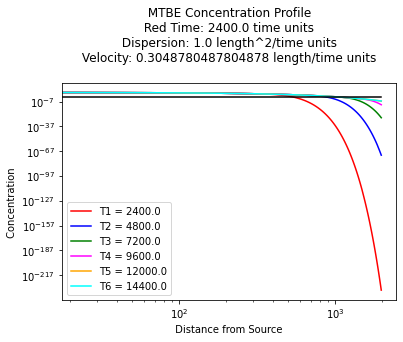

In [411]:
#
# example inputs
#
c_source = c_init # source concentration
c_mcl = 0.020 # MCL concentration
space = 2000.      # how far in X-direction to extend the plot
time  = 2400.       # time since release
dispersion = 1.0 # dispersion coefficient
velocity = 1*(1/3.28)   # pore velocity (meters per day)
retardation = 2.0
decay = math.log(2)/365
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 90   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c1 = [0.0 for i in range(how_many_points)]      # constructor notation
c2 = [0.0 for i in range(how_many_points)]      # constructor notation
c3 = [0.0 for i in range(how_many_points)]      # constructor notation
c4 = [0.0 for i in range(how_many_points)]      # constructor notation
c5 = [0.0 for i in range(how_many_points)]      # constructor notation
c6 = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c1[i] = c1dadrd(c_source,x[i],1*time,dispersion,velocity,retardation,decay)
    c2[i] = c1dadrd(c_source,x[i],2*time,dispersion,velocity,retardation,decay)
    c3[i] = c1dadrd(c_source,x[i],3*time,dispersion,velocity,retardation,decay)
    c4[i] = c1dadrd(c_source,x[i],4*time,dispersion,velocity,retardation,decay)
    c5[i] = c1dadrd(c_source,x[i],5*time,dispersion,velocity,retardation,decay)
    c6[i] = c1dadrd(c_source,x[i],6*time,dispersion,velocity,retardation,decay)

#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c1, color='red', linestyle = 'solid')  # make the plot object
plt.plot(x,c2, color='blue', linestyle = 'solid')  # make the plot object
plt.plot(x,c3, color='green', linestyle = 'solid')  # make the plot object
plt.plot(x,c4, color='magenta', linestyle = 'solid')  # make the plot object
plt.plot(x,c5, color='orange', linestyle = 'solid')  # make the plot object
plt.plot(x,c6, color='cyan', linestyle = 'solid')  # make the plot object
plt.plot([x[0],x[-1]],[c_mcl,c_mcl], color='black', linestyle = 'solid')  # make the plot object
plt.title(" MTBE Concentration Profile \n Red Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
plt.legend(["T1 = " + repr(1*time),"T2 = " + repr(2*time),"T3 = " + repr(3*time),\
            "T4 = " + repr(4*time),"T5 = " + repr(5*time),"T6 = " + repr(6*time)])
plt.xscale("log")
plt.yscale("log")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [412]:
# now search array for MCL value
whois=min(enumerate(c1), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",1*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c2), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",2*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c3), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",3*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c4), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",4*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c5), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",5*time," days is: ",x[whois[0]]," meters ")
whois=min(enumerate(c6), key=lambda x: abs(x[1]-c_mcl))
print("distance to MCL at time :",6*time," days is: ",x[whois[0]]," meters ")


distance to MCL at time : 2400.0  days is:  555.5555555555555  meters 
distance to MCL at time : 4800.0  days is:  888.8888888888889  meters 
distance to MCL at time : 7200.0  days is:  1088.888888888889  meters 
distance to MCL at time : 9600.0  days is:  1088.888888888889  meters 
distance to MCL at time : 12000.0  days is:  1088.888888888889  meters 
distance to MCL at time : 14400.0  days is:  1088.888888888889  meters 


Asymptotic distance to MCL is 1088 meters